# Arrhythmias Data Processing


### What is Arrhythmias?
Scientifically known as **cardiac arrhythmias**, refer to abnormal patterns or disturbances in the regular electrical activity of the heart. The heart relies on a precisely coordinated electrical system to generate rhythmic contractions, ensuring efficient blood pumping throughout the body. However, in the presence of arrhythmias, this electrical system becomes disrupted, resulting in irregular heart rhythms.

### What Cause Arrhythmias?
Arrhythmias can be caused by a variety of factors that disrupt the normal electrical activity of the heart. Here are some common causes of arrhythmias:
- Current heart attack or scarring from a previous heart attack.
- Blocked arteries in the heart (coronary artery disease)
- Changes to the heart's structure, such as from cardiomyopathy.
- Diabetes.
- High blood pressure.
- Infection with COVID-19.
- Overactive thyroid gland (hyperthyroidism)
- Sleep apnea.

According to the given dataset, we have classified several factors that can cause arrhythmias and need to be monitored:

- Heart Rate
- QRS Duration
- QRS
- Age
- Weight
- Sex

And finally,diagnosis with how severe the arrhythmia.

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import scipy.stats as st

# Reading CSV Files
This section of code is responsible for reading a specific CSV file containing Arrhythmia data and customizing it according to the requirements of the program or analysis at hand. The code utilizes appropriate methods or libraries to read the CSV file, extracting the relevant data fields and records. Once the data is loaded, it can be modified, transformed, or processed further as needed, based on the specific objectives or tasks of the program. This customization step allows for the adaptation of the Arrhythmia data to suit the specific needs or constraints of the subsequent stages of the program, such as preprocessing, analysis, or modeling. By tailoring the data in this manner, the program can effectively leverage the Arrhythmia dataset for further exploration, analysis, or utilization in a way that aligns with the desired objectives and requirements.

In [81]:
df = pd.read_csv('docs/data_arrhythmia.csv', delimiter=';', na_values='?')

In [82]:
print(len(df[df['diagnosis'] == 1]))
print(len(df[df['diagnosis'] > 1]))

245
207


### Exploratory Data Analysis (EDA)
Perform initial exploratory data analysis (EDA) to understand the structure and content of the dataset. This includes checking the dimensions, inspecting the data types, looking for missing values, and exploring summary statistics.

In [83]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [84]:
df.dtypes

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
sex,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
height,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
weight,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
qrs_duration,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
LD,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
LE,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
LF,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
LG,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 988.9 KB


In [87]:
df.shape

(452, 280)

## Finding Missing Data in a Column

In [88]:
missing_data = pd.DataFrame(
    {'total null': df.isnull().sum(), 'null percentage': ((df.isnull().sum() / df.shape[0]) * 100)}
)
missing_data

,total null,null percentage
age,0,0.0
sex,0,0.0
height,0,0.0
weight,0,0.0
qrs_duration,0,0.0
...,...,...
LD,0,0.0
LE,0,0.0
LF,0,0.0
LG,0,0.0


### Data Column Detection
Whether Null or contains entire 0

In [89]:
def detect_null_columns(data):
    null_columns = []
    for column in data.columns:
        if data[column].isnull().any():
            null_columns.append(column)
    return null_columns


def detect_zero_columns(data):
    zero_columns = []
    for i, column in enumerate(data.columns):
        if (data[column] == 0).all():
            zero_columns.append((f'Position: {i + 1}', column))
    return zero_columns

In [90]:
# Detect Null on the entire column
null_list = detect_null_columns(df)
print(f'Considered as null column: {null_list}')

# Detect Zero on the entire column
zero_columns_list = detect_zero_columns(df)
print(f'Considered as entire 0 column: {zero_columns_list}')

Considered as null column: ['T', 'P', 'QRST', 'J', 'heart_rate']
Considered as entire 0 column: [('Position: 20', "S'_wave"), ('Position: 68', 'CB'), ('Position: 70', 'CD'), ('Position: 84', 'CS'), ('Position: 132', 'EV'), ('Position: 133', 'EY'), ('Position: 140', 'FF'), ('Position: 142', 'FH'), ('Position: 144', 'FJ'), ('Position: 146', 'FL'), ('Position: 152', 'FS'), ('Position: 157', 'FZ'), ('Position: 158', 'GA'), ('Position: 165', 'GH'), ('Position: 205', 'IB'), ('Position: 265', 'KP'), ('Position: 275', 'LC')]


# Dropping Unuseful Data
The process of dropping data refers to the removal or exclusion of specific data points or variables from a dataset. In this particular context, the purpose of this dropping operation is to facilitate the cleaning phase of the data preprocessing stage. By removing unnecessary or irrelevant data points or variables, the dataset becomes more refined and streamlined, ensuring a higher quality input for subsequent pre-processing steps. This preliminary data cleaning step helps to improve the overall accuracy, reliability, and effectiveness of the subsequent data preprocessing operations, ultimately leading to more reliable and meaningful analysis or modeling outcomes.

In [91]:
columns_with_all_null = df.columns[df.isnull().all()]
df = df.drop(columns_with_all_null, axis=1)
df = df[df['height'] <= 200]  # Will drop data if the height is more than 200.
df = df[df['weight'] <= 200]  # Will drop data if the weight is more than 200.
df.drop('J', axis=1, inplace=True)
df.to_csv('docs/cleaned_file.csv', index=False)

In [92]:
## Testing After Dropping some data
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [93]:
# Detect Null on the entire column
null_list = detect_null_columns(df)
print(f'Considered as null column: {null_list}')

# Detect Zero on the entire column
zero_columns_list = detect_zero_columns(df)
print(f'Considered as entire 0 column: {zero_columns_list}')

Considered as null column: ['T', 'P', 'QRST', 'heart_rate']
Considered as entire 0 column: [('Position: 19', "S'_wave"), ('Position: 67', 'CB'), ('Position: 69', 'CD'), ('Position: 74', 'CI'), ('Position: 83', 'CS'), ('Position: 131', 'EV'), ('Position: 132', 'EY'), ('Position: 139', 'FF'), ('Position: 141', 'FH'), ('Position: 143', 'FJ'), ('Position: 145', 'FL'), ('Position: 151', 'FS'), ('Position: 156', 'FZ'), ('Position: 157', 'GA'), ('Position: 164', 'GH'), ('Position: 204', 'IB'), ('Position: 264', 'KP'), ('Position: 274', 'LC')]


In [94]:
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000
mean,46.675556,0.551111,163.842222,68.437778,88.942222,155.195556,367.797778,170.086667,90.035556,33.353333,...,-0.278667,9.067111,-1.441333,0.004000,0.0,0.513111,1.220667,19.432222,29.588222,3.875556
std,16.214228,0.497934,10.412195,16.132715,15.394913,44.918555,32.260307,35.644734,25.834294,45.254362,...,0.549580,3.468655,1.992218,0.050229,0.0,0.346322,1.427738,13.430692,18.453662,4.416267
min,1.000000,0.000000,105.000000,10.000000,55.000000,0.000000,240.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.250000,...,-0.400000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.500000,17.725000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.500000,157.000000,367.500000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.150000,28.100000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.875000,41.175000,6.000000
max,83.000000,1.000000,190.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# Adding ID to the data
The following code snippet introduces a new class called "ID". This addition expands the functionality and structure of the existing codebase by incorporating the "ID" class. By introducing this class, the program gains the ability to handle and manipulate data associated with unique identifiers. The inclusion of the "ID" class enhances the overall organization and flexibility of the code, allowing for more efficient and streamlined data management within the system.

In [95]:
id_data = [i for i in range(len(df))]
df['id'] = id_data

In [96]:
## After adding ID class data
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8,0
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10,2
3,55,0,175,94,100,202,380,179,143,28,...,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1,3
4,75,0,190,80,88,181,360,177,103,-16,...,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1,445
448,37,0,190,85,100,137,361,201,73,86,...,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10,446
449,36,0,166,68,108,176,365,194,116,-85,...,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2,447
450,32,1,155,55,93,106,386,218,63,54,...,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1,448


# Folding Data
This process will split data into _Training Dataset_, _Validation Dataset_, and lastly _Test Dataset_.

In [124]:
train_dataset, validation_dataset, test_dataset = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [127]:
train_dataset

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
439,49,1,168,66,94,170,383,152,115,92,...,8.2,-0.7,0.0,0,0.8,1.7,21.5,33.7,1,437
309,40,0,176,74,92,216,362,161,86,83,...,5.4,0.0,0.0,0,0.0,1.4,14.0,25.7,7,308
65,44,1,155,65,80,117,363,142,72,56,...,6.2,0.0,0.0,0,0.5,1.1,16.1,23.8,1,65
203,35,1,160,51,71,124,367,168,68,44,...,9.5,-0.5,0.0,0,0.3,3.5,22.5,54.0,1,202
22,36,1,153,75,71,132,364,169,82,62,...,8.9,-1.0,0.0,0,0.5,1.7,19.7,34.3,1,22
119,58,1,170,75,90,157,382,168,114,52,...,10.9,-1.8,0.0,0,0.5,1.2,22.2,31.0,1,119
165,25,1,162,48,74,115,377,116,67,56,...,8.7,0.0,0.0,0,0.5,0.6,22.6,25.2,1,164
215,30,1,160,65,79,131,360,140,77,3,...,6.8,-2.1,0.0,0,0.1,2.2,11.1,27.8,1,214
156,45,1,162,61,75,122,357,143,72,50,...,11.6,0.0,0.0,0,0.7,1.4,27.8,35.9,1,155
69,64,1,156,82,87,171,380,152,102,-36,...,3.9,-1.0,0.0,0,0.7,1.6,6.6,19.0,1,69


In [128]:
validation_dataset

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
51,28,1,156,52,83,135,359,169,80,34,...,6.3,-0.9,0.0,0,0.5,1.2,11.9,22.7,1,51
15,47,1,150,48,75,132,350,169,65,36,...,7.7,-0.8,0.0,0,0.6,1.7,17.2,31.1,1,15
378,67,1,160,68,87,158,386,152,115,58,...,9.1,-1.6,0.0,0,0.9,2.0,20.8,36.8,1,376
186,47,1,163,55,92,187,367,122,102,76,...,6.9,0.0,0.0,0,0.8,0.7,17.9,22.3,2,185
61,35,1,160,51,78,147,324,155,75,40,...,9.5,-2.4,0.0,0,0.7,2.4,12.0,33.1,5,61
263,38,1,170,95,81,173,337,154,100,71,...,11.7,-2.7,0.0,0,0.4,0.4,25.0,27.1,1,262
390,66,1,160,53,72,164,379,160,87,44,...,4.7,-0.4,0.0,0,0.7,1.5,9.9,21.6,1,388


In [129]:
test_dataset

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
206,53,0,178,84,90,176,355,150,108,-15,...,8.1,-3.4,0.0,0,0.4,2.3,7.6,26.0,1,205
155,45,0,169,73,92,124,370,180,62,25,...,9.7,0.0,0.0,0,0.7,2.8,26.9,57.7,1,154
148,39,1,160,62,80,123,375,153,67,60,...,5.3,-0.7,0.0,0,0.4,1.9,9.2,23.2,1,147
444,29,0,166,63,81,143,325,218,74,24,...,7.8,-1.3,0.0,0,0.5,2.3,14.1,37.1,1,442
287,35,1,155,58,81,184,386,153,89,73,...,6.3,-0.5,0.0,0,0.5,1.9,15.4,31.3,1,286
399,71,1,165,82,82,182,369,152,107,33,...,6.2,-3.5,0.0,0,0.6,1.3,2.6,11.4,1,397
74,35,1,158,60,87,138,383,178,68,61,...,11.2,0.0,0.0,0,0.4,3.5,29.1,60.6,1,74
314,64,0,167,72,85,154,352,152,69,13,...,10.7,-1.6,0.0,0,0.7,2.3,22.4,43.1,1,313


# Data Visualize

This graphical representation showcases of data visualize visualization designed specifically for introductory purposes. The box plot provides a concise summary of the distribution and statistical properties of a dataset. Through the utilization of key statistical measures such as the median, quartiles, and potential outliers, the box plot offers a simplified yet informative depiction of the data's central tendency and variability. By employing this box plot visualization technique, users can gain initial insights into the dataset's distributional characteristics, facilitating an enhanced understanding of the data at a fundamental level.

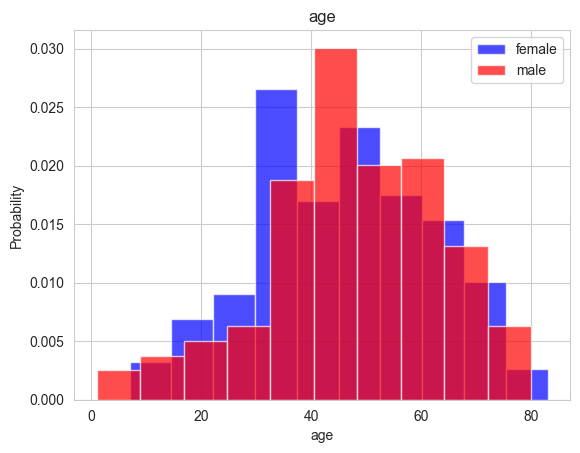

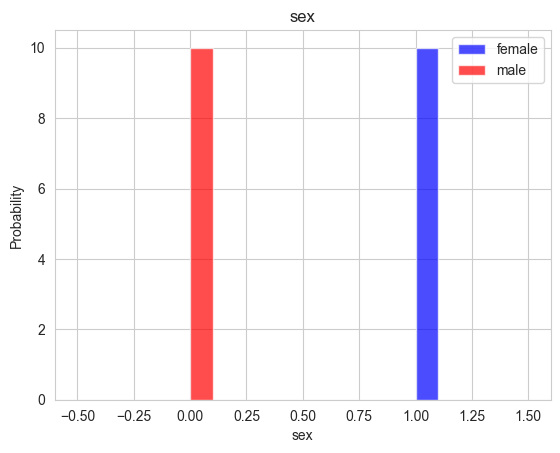

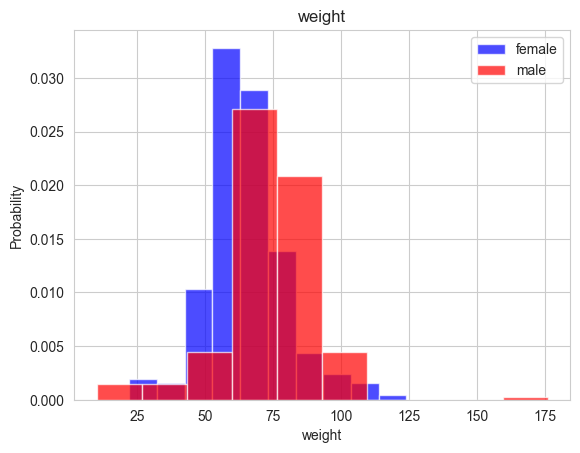

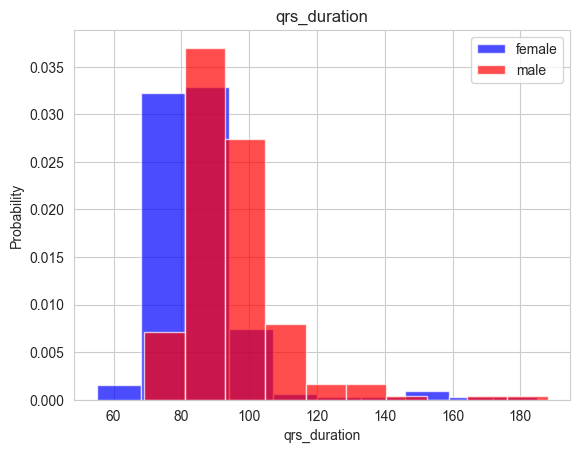

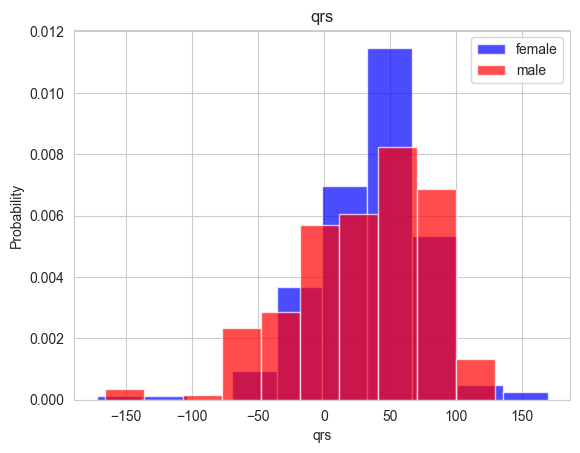

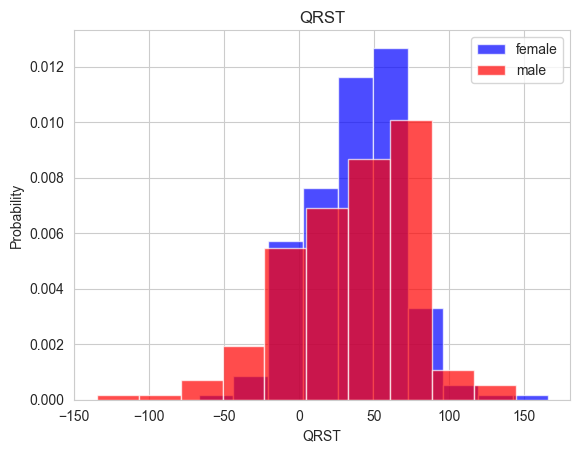

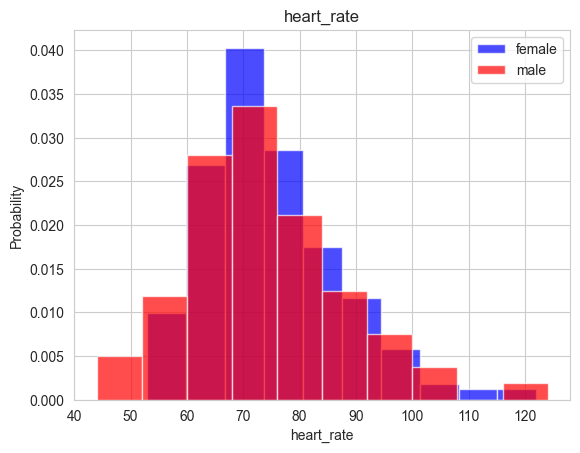

In [98]:
sample_column = ['age', 'sex', 'weight', 'qrs_duration', 'qrs', 'QRST', 'heart_rate', 'diagnosis']
for label in sample_column[:-1]:
    plt.hist(df[df["sex"] == 1][label], color='blue', label='female', alpha=0.7, density=True)
    plt.hist(df[df["sex"] == 0][label], color='red', label='male', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## 1. Visualizing Gender with Diagnosis data

This study aims to visualize the potential influence of gender on diagnosis rates and severity levels. By analyzing the data, it seeks to determine if gender plays a significant role in identifying individuals with the highest diagnosis rates and severity. The findings will contribute to understanding the relationship between gender and health outcomes.

### Box Plot

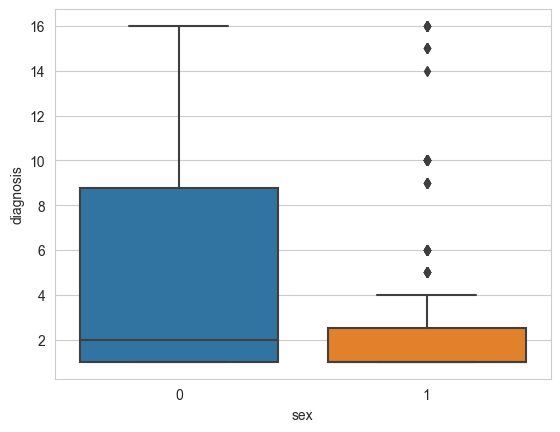

In [99]:
# Box Plot Function
sns.boxplot(x='sex', y='diagnosis', data=df)
plt.show()

Based on the information presented in the box plot, it is evident that the category labeled '1' exhibits a considerable number of outliers. Consequently, it is planned to exclude or eliminate this category in subsequent analyses or investigations.

### LM Plot

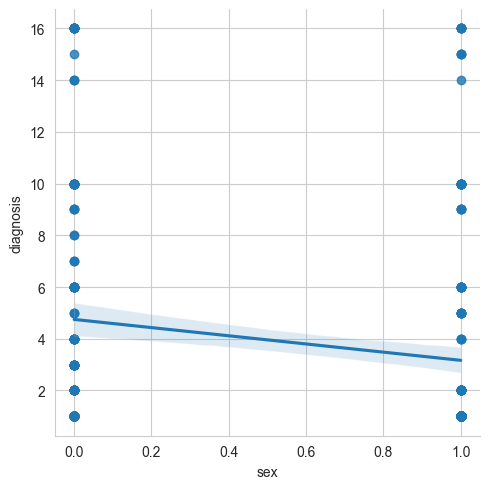

In [100]:
sns.lmplot(x='sex', y='diagnosis', data=df)
plt.show()

### Scatter Plot

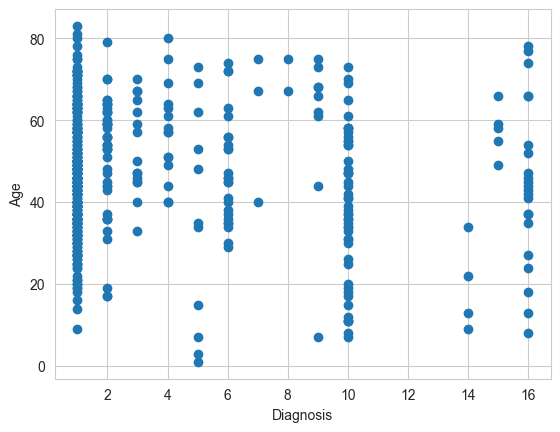

In [101]:
plt.scatter(df['diagnosis'], df['age'])
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

## 2. Visualizing Weight with Age data

The presented boxplot provides a visual representation of the comparison between weight and age data. By using this boxplot, the relationship and distribution of weight and age can be effectively examined and compared. The boxplot allows for the identification of key statistical measures, such as median, quartiles, and potential outliers, providing insights into the central tendency and variability of the data. This visualization facilitates a clear understanding of the relationship between weight and age, enabling further analysis and interpretation of their potential associations or patterns within the given context.

### Box Plot

<Axes: xlabel='age', ylabel='weight'>

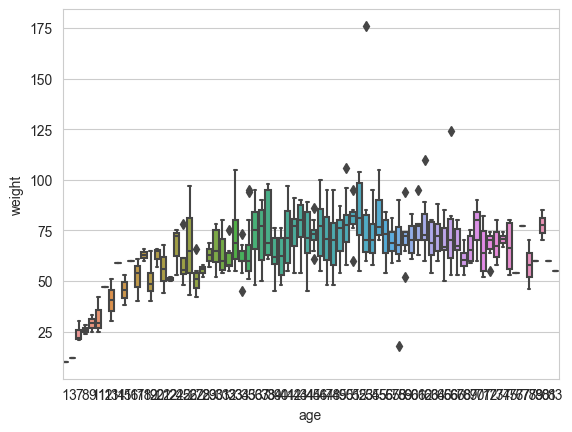

In [102]:
sns.boxplot(x='age', y='weight', data=df)

### LM Plot

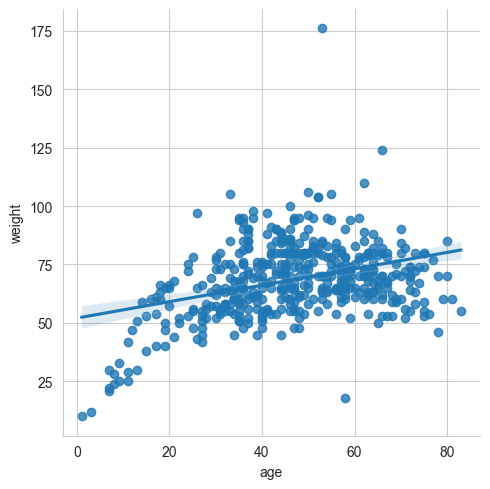

In [103]:
sns.lmplot(x='age', y='weight', data=df)
plt.show()

### Scatter Plot

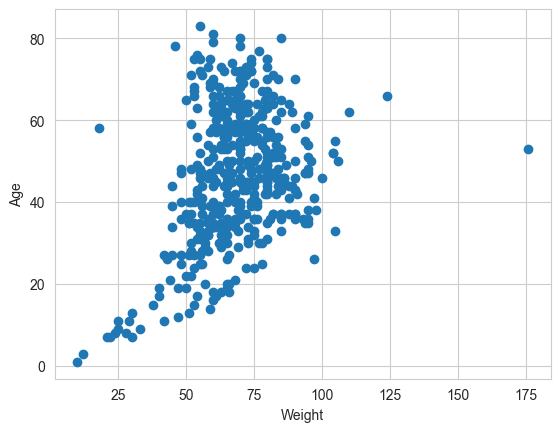

In [104]:
plt.scatter(df['weight'], df['age'])
plt.xlabel('Weight')
plt.ylabel('Age')
plt.show()

## 3. Visualizing Age with QRS Duration

The presented provides a visual representation of the comparison between age and QRS duration data. By using this many various data model, the relationship and distribution of weight and age can be effectively examined and compared. The boxplot allows for the identification of key statistical measures, such as median, quartiles, and potential outliers, providing insights into the central tendency and variability of the data. This visualization facilitates a clear understanding of the relationship between weight and age, enabling further analysis and interpretation of their potential associations or patterns within the given context.

### Box Plot

<Axes: xlabel='age', ylabel='qrs_duration'>

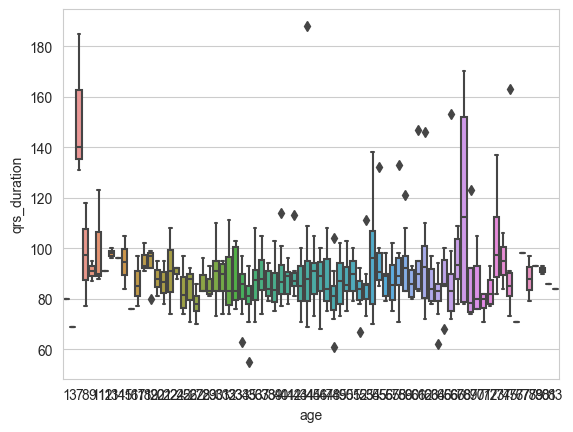

In [105]:
sns.boxplot(x='age', y='qrs_duration', data=df)

### LM Plot

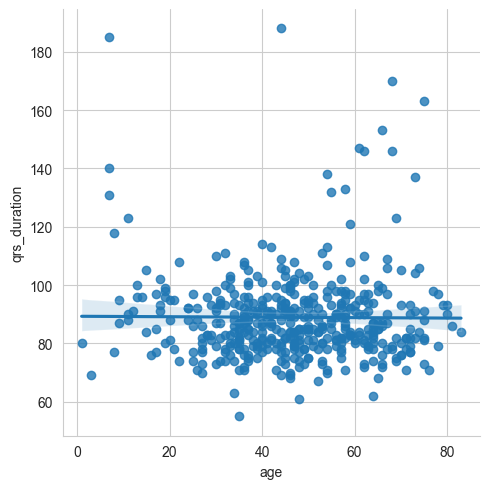

In [106]:
sns.lmplot(x='age', y='qrs_duration', data=df)
plt.show()

### Scatter Plot

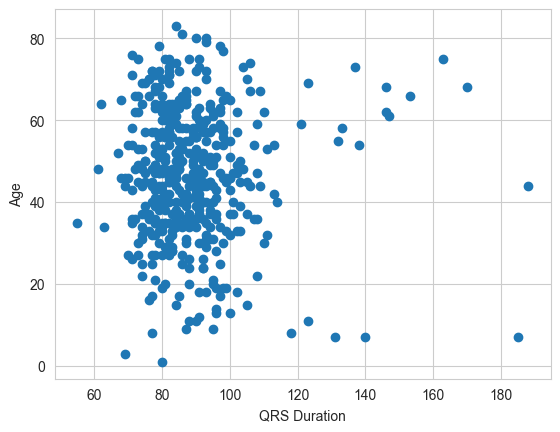

In [107]:
plt.scatter(df['qrs_duration'], df['age'])
plt.xlabel('QRS Duration')
plt.ylabel('Age')
plt.show()

# Pre-Processing Step
It is an essential step in data analysis and machine learning that involves transforming raw data into a clean, consistent, and structured format suitable for further analysis. It involves several techniques and operations to improve the quality and usability of the data before it is used for modeling or analysis.

### Data Info

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 451
Columns: 280 entries, age to id
dtypes: float64(120), int64(160)
memory usage: 987.9 KB


### Data Describe

In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36.0,47.472222,13.487531,25.0,35.750,47.00,57.250,72.0
sex,36.0,0.777778,0.421637,0.0,1.000,1.00,1.000,1.0
height,36.0,162.944444,6.807326,150.0,159.500,161.00,167.250,178.0
weight,36.0,66.611111,11.457444,48.0,58.750,65.50,74.250,95.0
qrs_duration,36.0,81.583333,7.100805,71.0,75.000,80.00,87.000,95.0
...,...,...,...,...,...,...,...,...
LE,36.0,1.633333,0.745654,0.4,1.175,1.65,2.000,3.5
LF,36.0,16.663889,6.879334,2.6,11.100,16.30,22.250,29.1
LG,36.0,29.888889,11.171003,11.4,23.075,27.45,34.675,60.6
diagnosis,36.0,1.305556,1.190905,1.0,1.000,1.00,1.000,7.0


## Detecting Data Anomaly
There are several approach on how to detect a data anomaly.

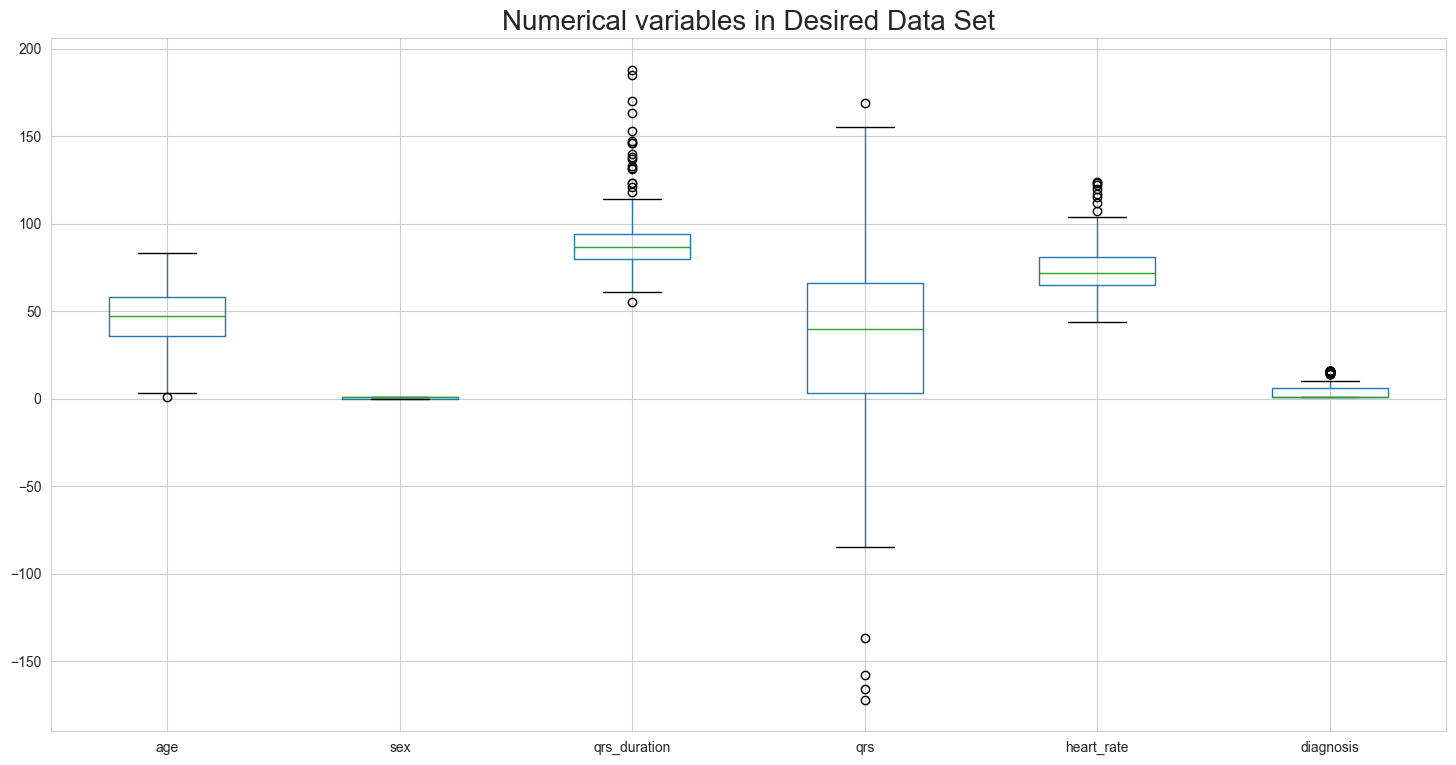

In [110]:
data_set = ['age', 'sex', 'qrs_duration', 'qrs', 'heart_rate', 'diagnosis']
plt.figure(figsize=(18, 9))
df[data_set].boxplot()
plt.title("Numerical variables in Desired Data Set", fontsize=20)
plt.show()

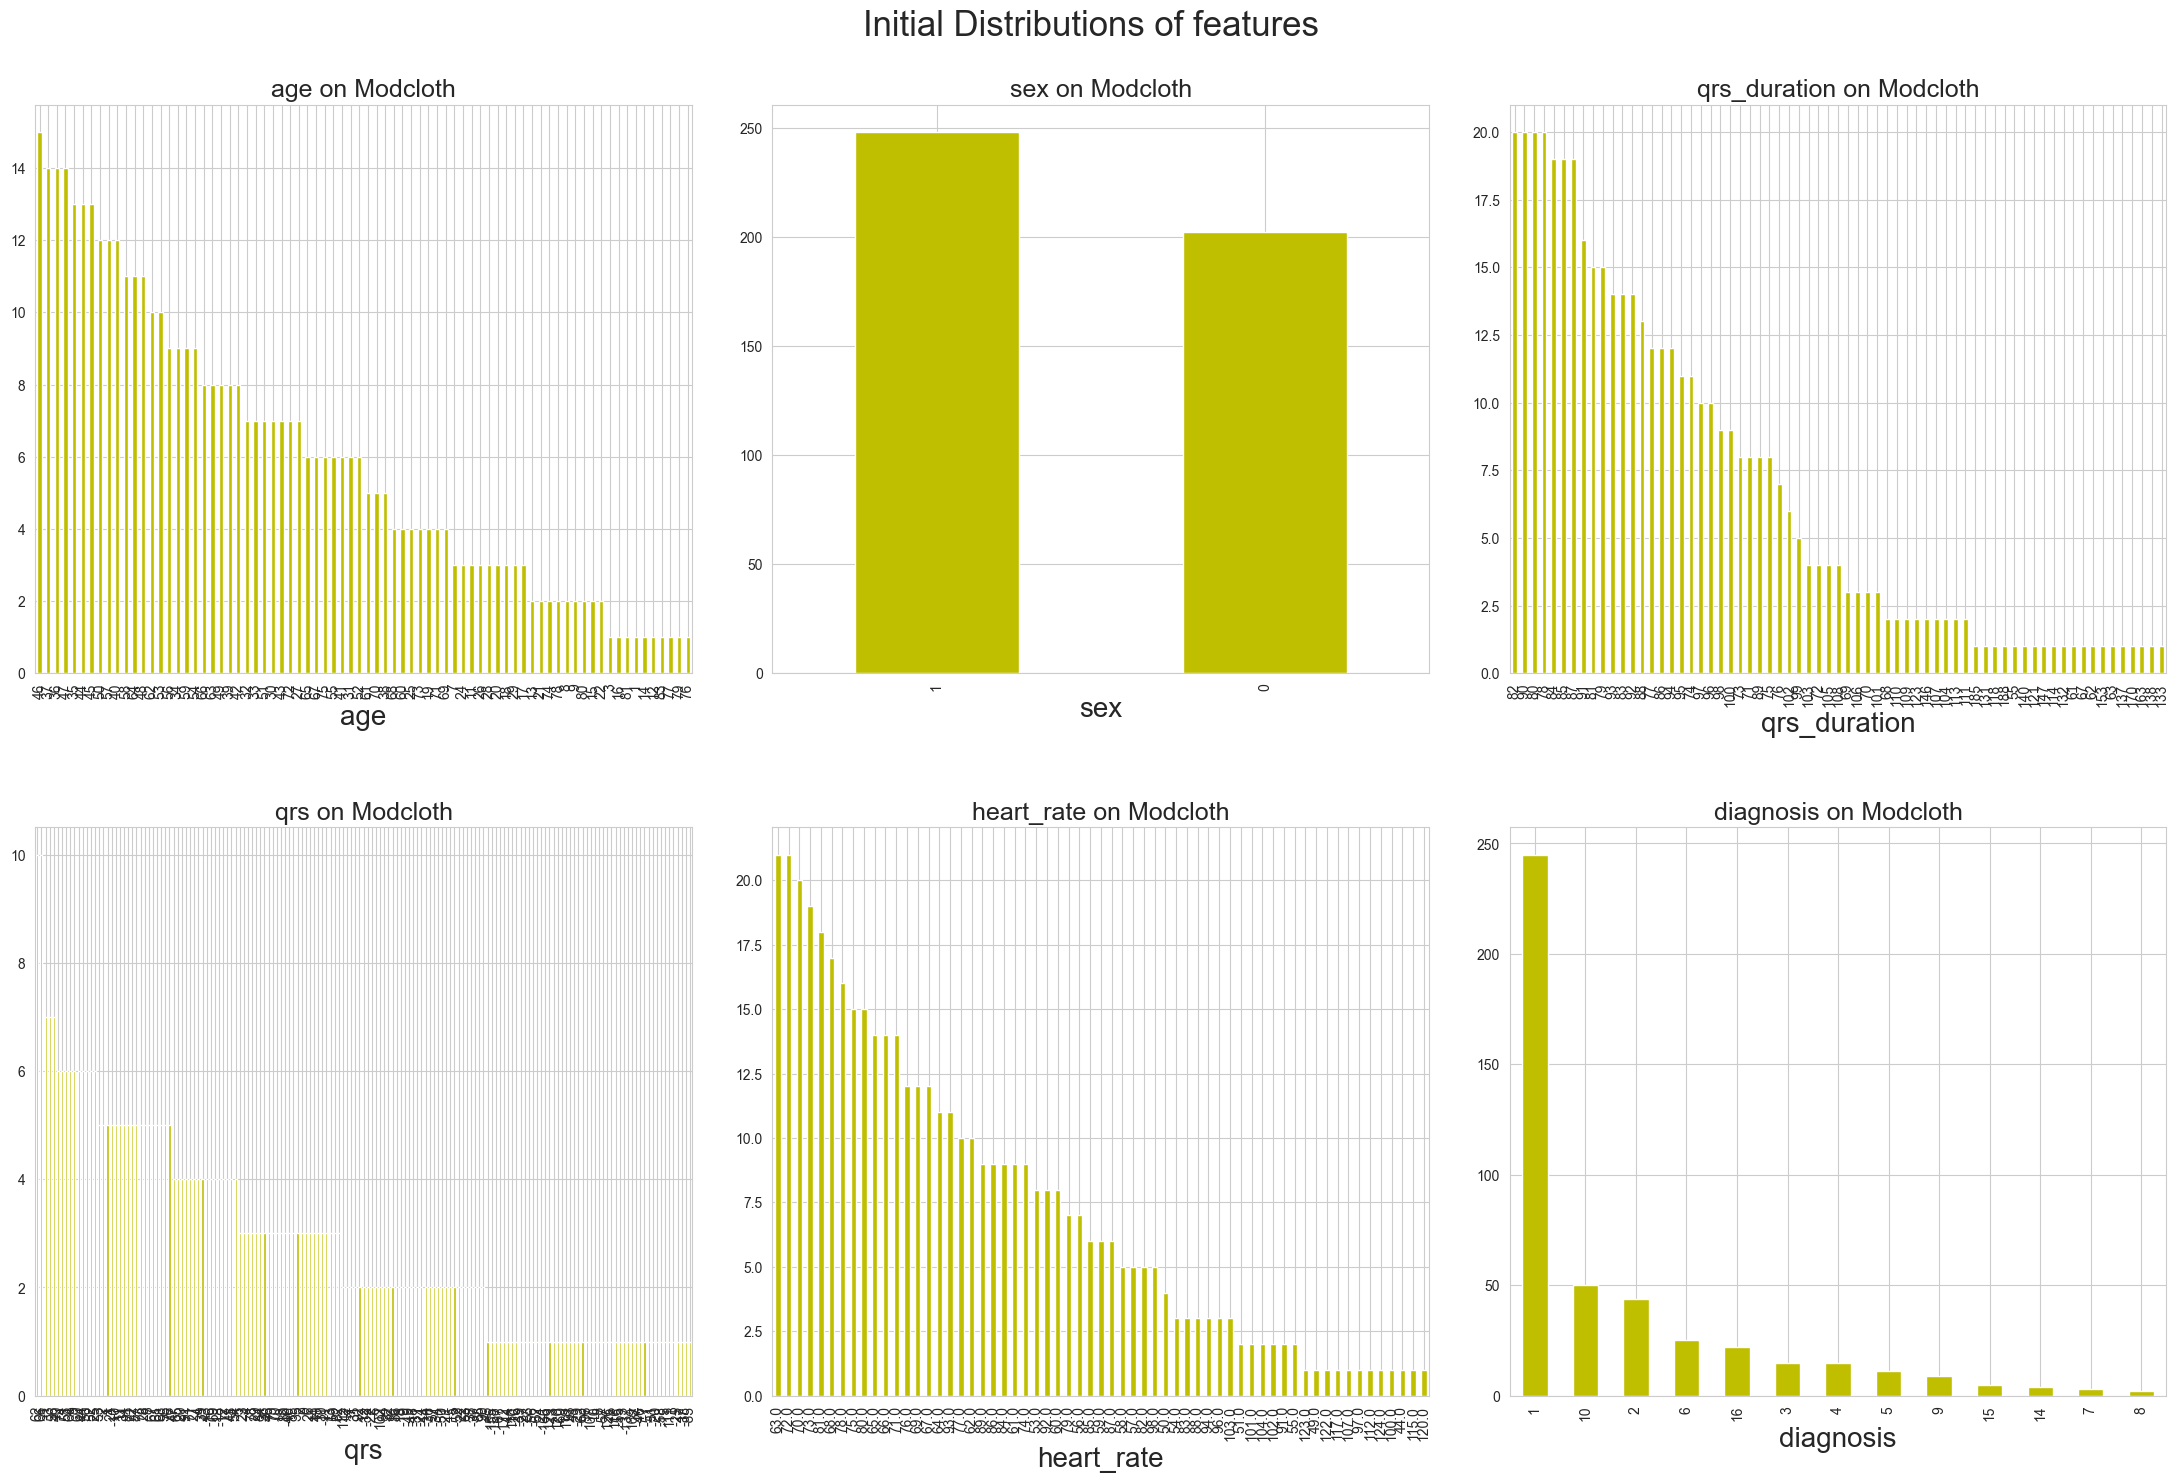

In [111]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize=18)
    return ax


f, ax = plt.subplots(2, 3, figsize=(22, 15))
f.tight_layout(h_pad=9, w_pad=3, rect=[0, 0.03, 1, 0.93])
cols = ['age', 'sex', 'qrs_duration', 'qrs', 'heart_rate', 'diagnosis']
k = 0
for i in range(2):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize=25)

C:\Users\IKHSAN PC\AppData\Local\Temp\ipykernel_4736\2039971291.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False, fit=st.johnsonsu)
C:\Users\IKHSAN PC\AppData\Local\Temp\ipykernel_4736\2039971291.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False, fit=st.norm

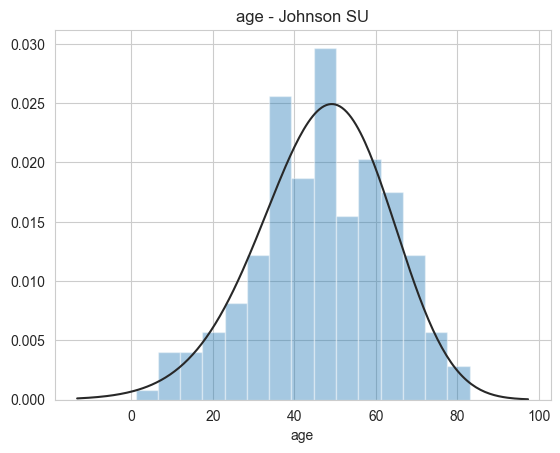

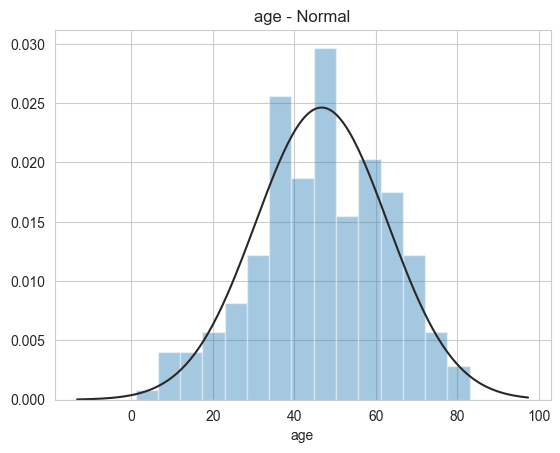

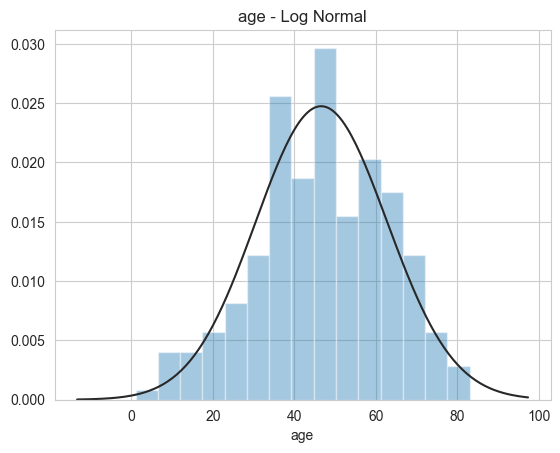

E:\Project\Programming\Backend\Python\MachineLearning\PyCompile\venv\Lib\site-packages\scipy\stats\_continuous_distns.py:4905: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))


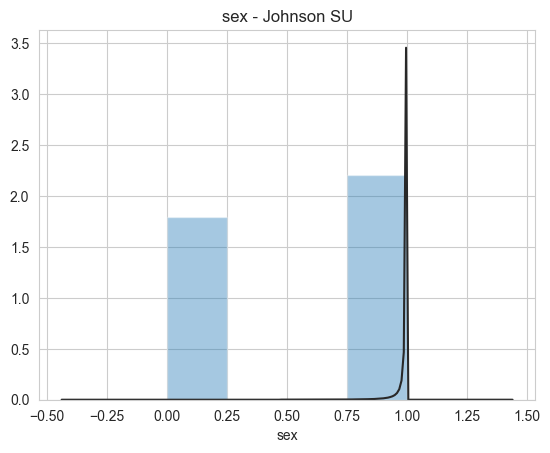

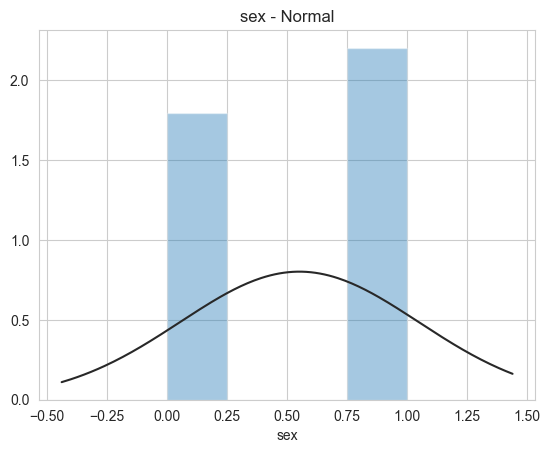

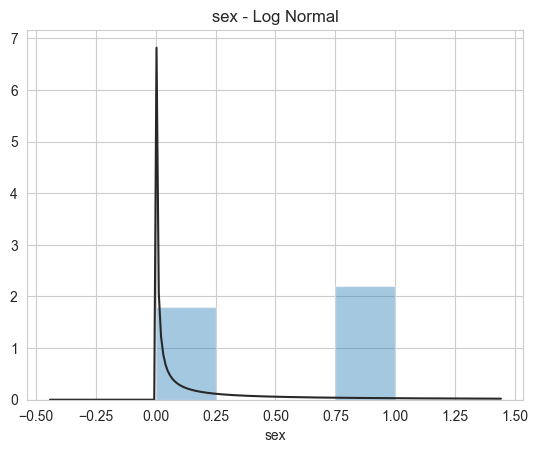

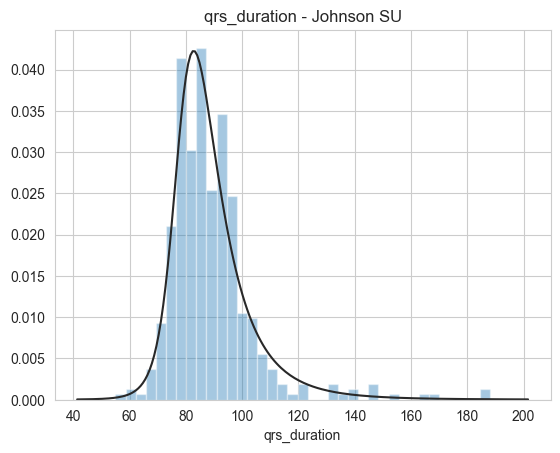

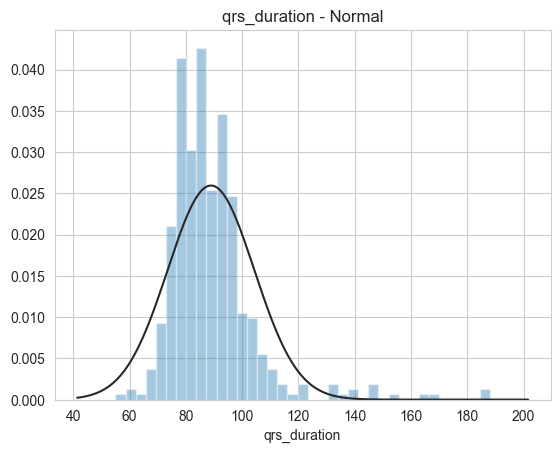

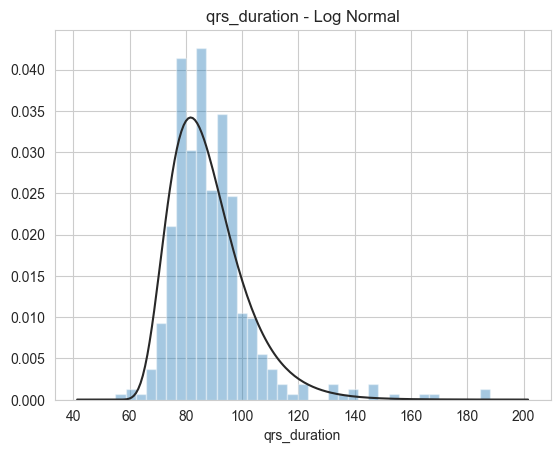

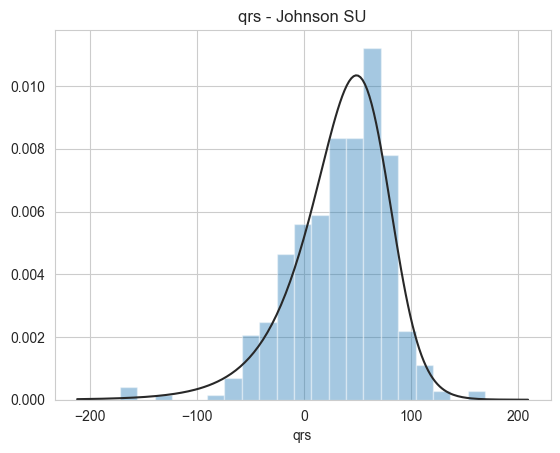

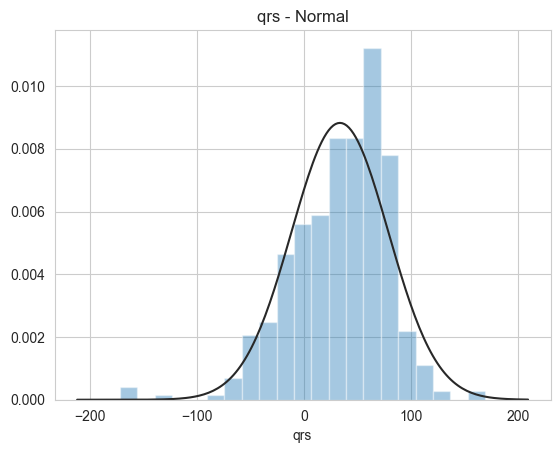

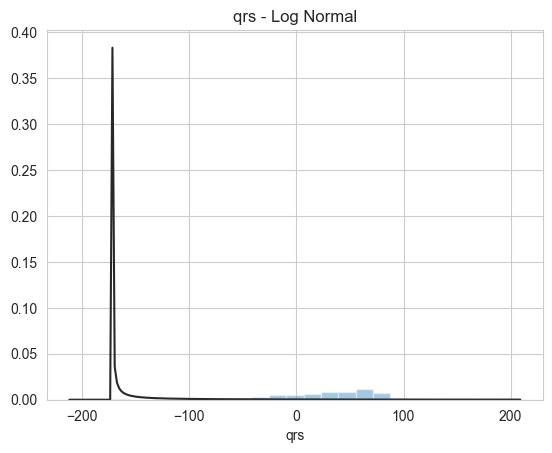

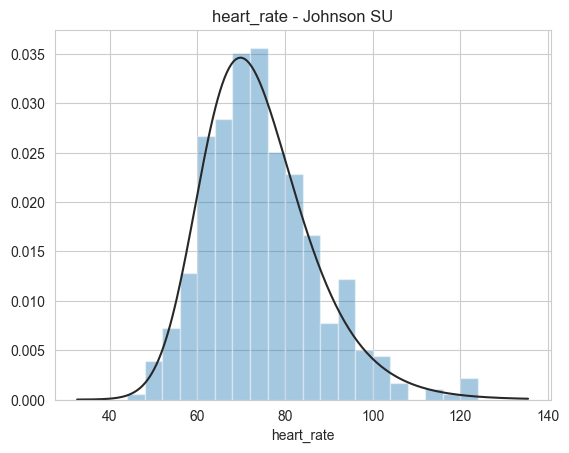

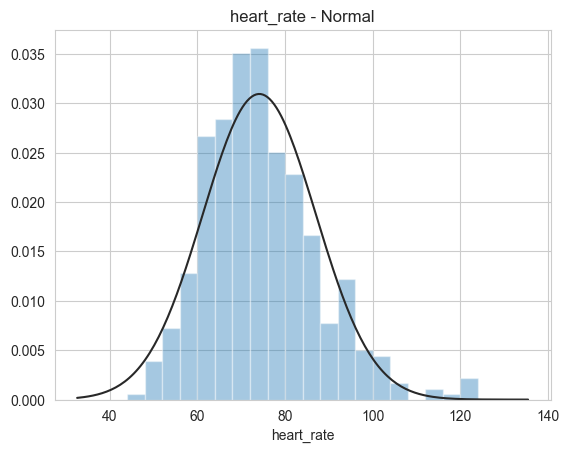

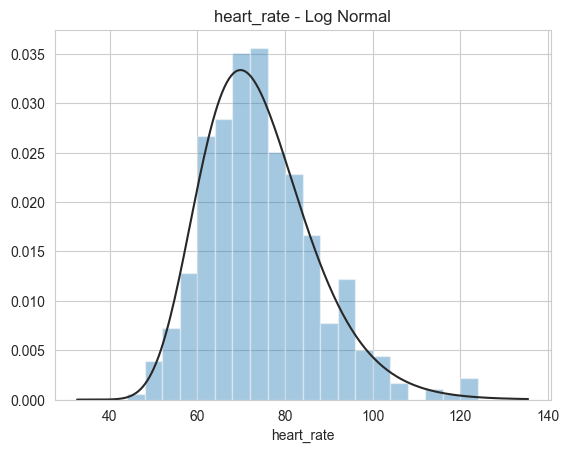

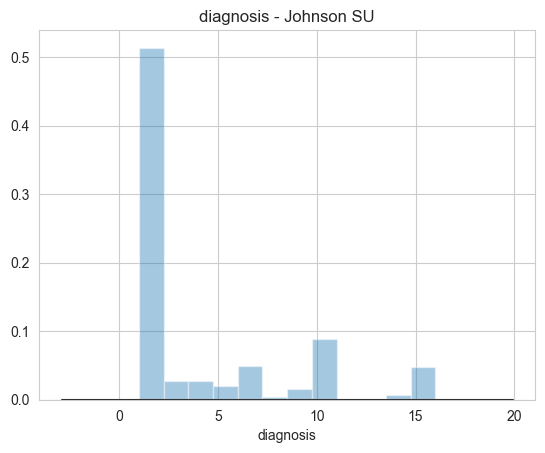

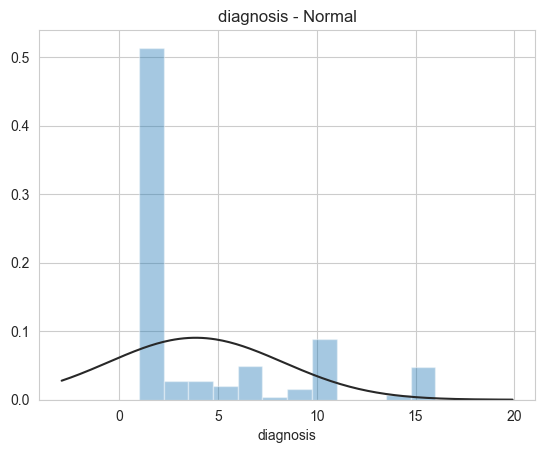

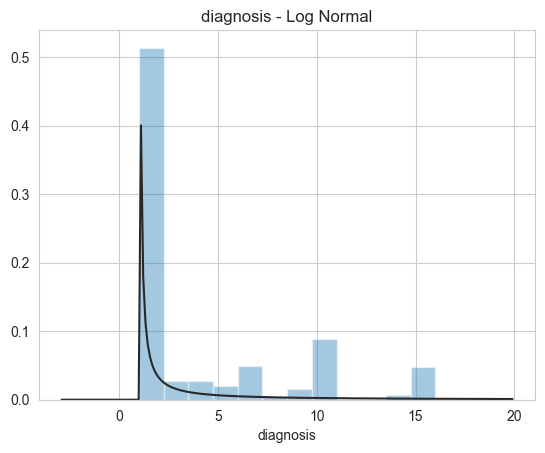

In [112]:
for col in data_set:
    data = df[col]

    plt.figure()
    plt.title(f'{col} - Johnson SU')
    sns.distplot(data, kde=False, fit=st.johnsonsu)

    plt.figure()
    plt.title(f'{col} - Normal')
    sns.distplot(data, kde=False, fit=st.norm)

    plt.figure()
    plt.title(f'{col} - Log Normal')
    sns.distplot(data, kde=False, fit=st.lognorm)

    plt.show()

### Removing Outliers

#### IQR Method
This method calculates the z-score for each data point, indicating how many standard deviations it is away from the mean. Data points with z-scores above a certain threshold (e.g., 2 or 3) are considered outliers.

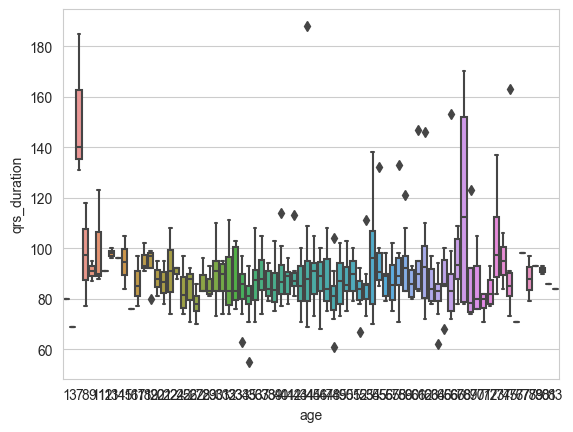

In [113]:
# BEFORE IQR - AGE AGAINST QRS DURATION
sns.boxplot(x='age', y='qrs_duration', data=df)
plt.show()

In [114]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3 - q1
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

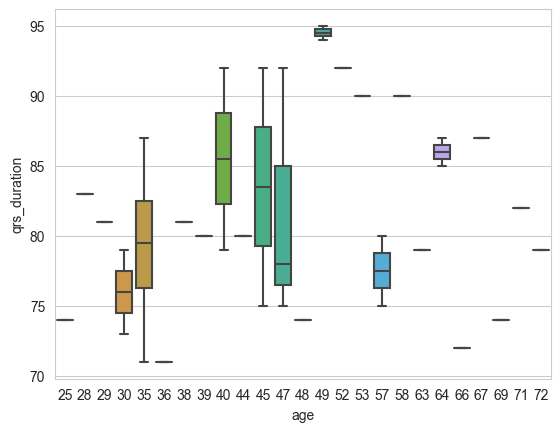

In [115]:
# AFTER IQR - AGE AGAINST QRS DURATION
sns.boxplot(x='age', y='qrs_duration', data=df)
plt.show()

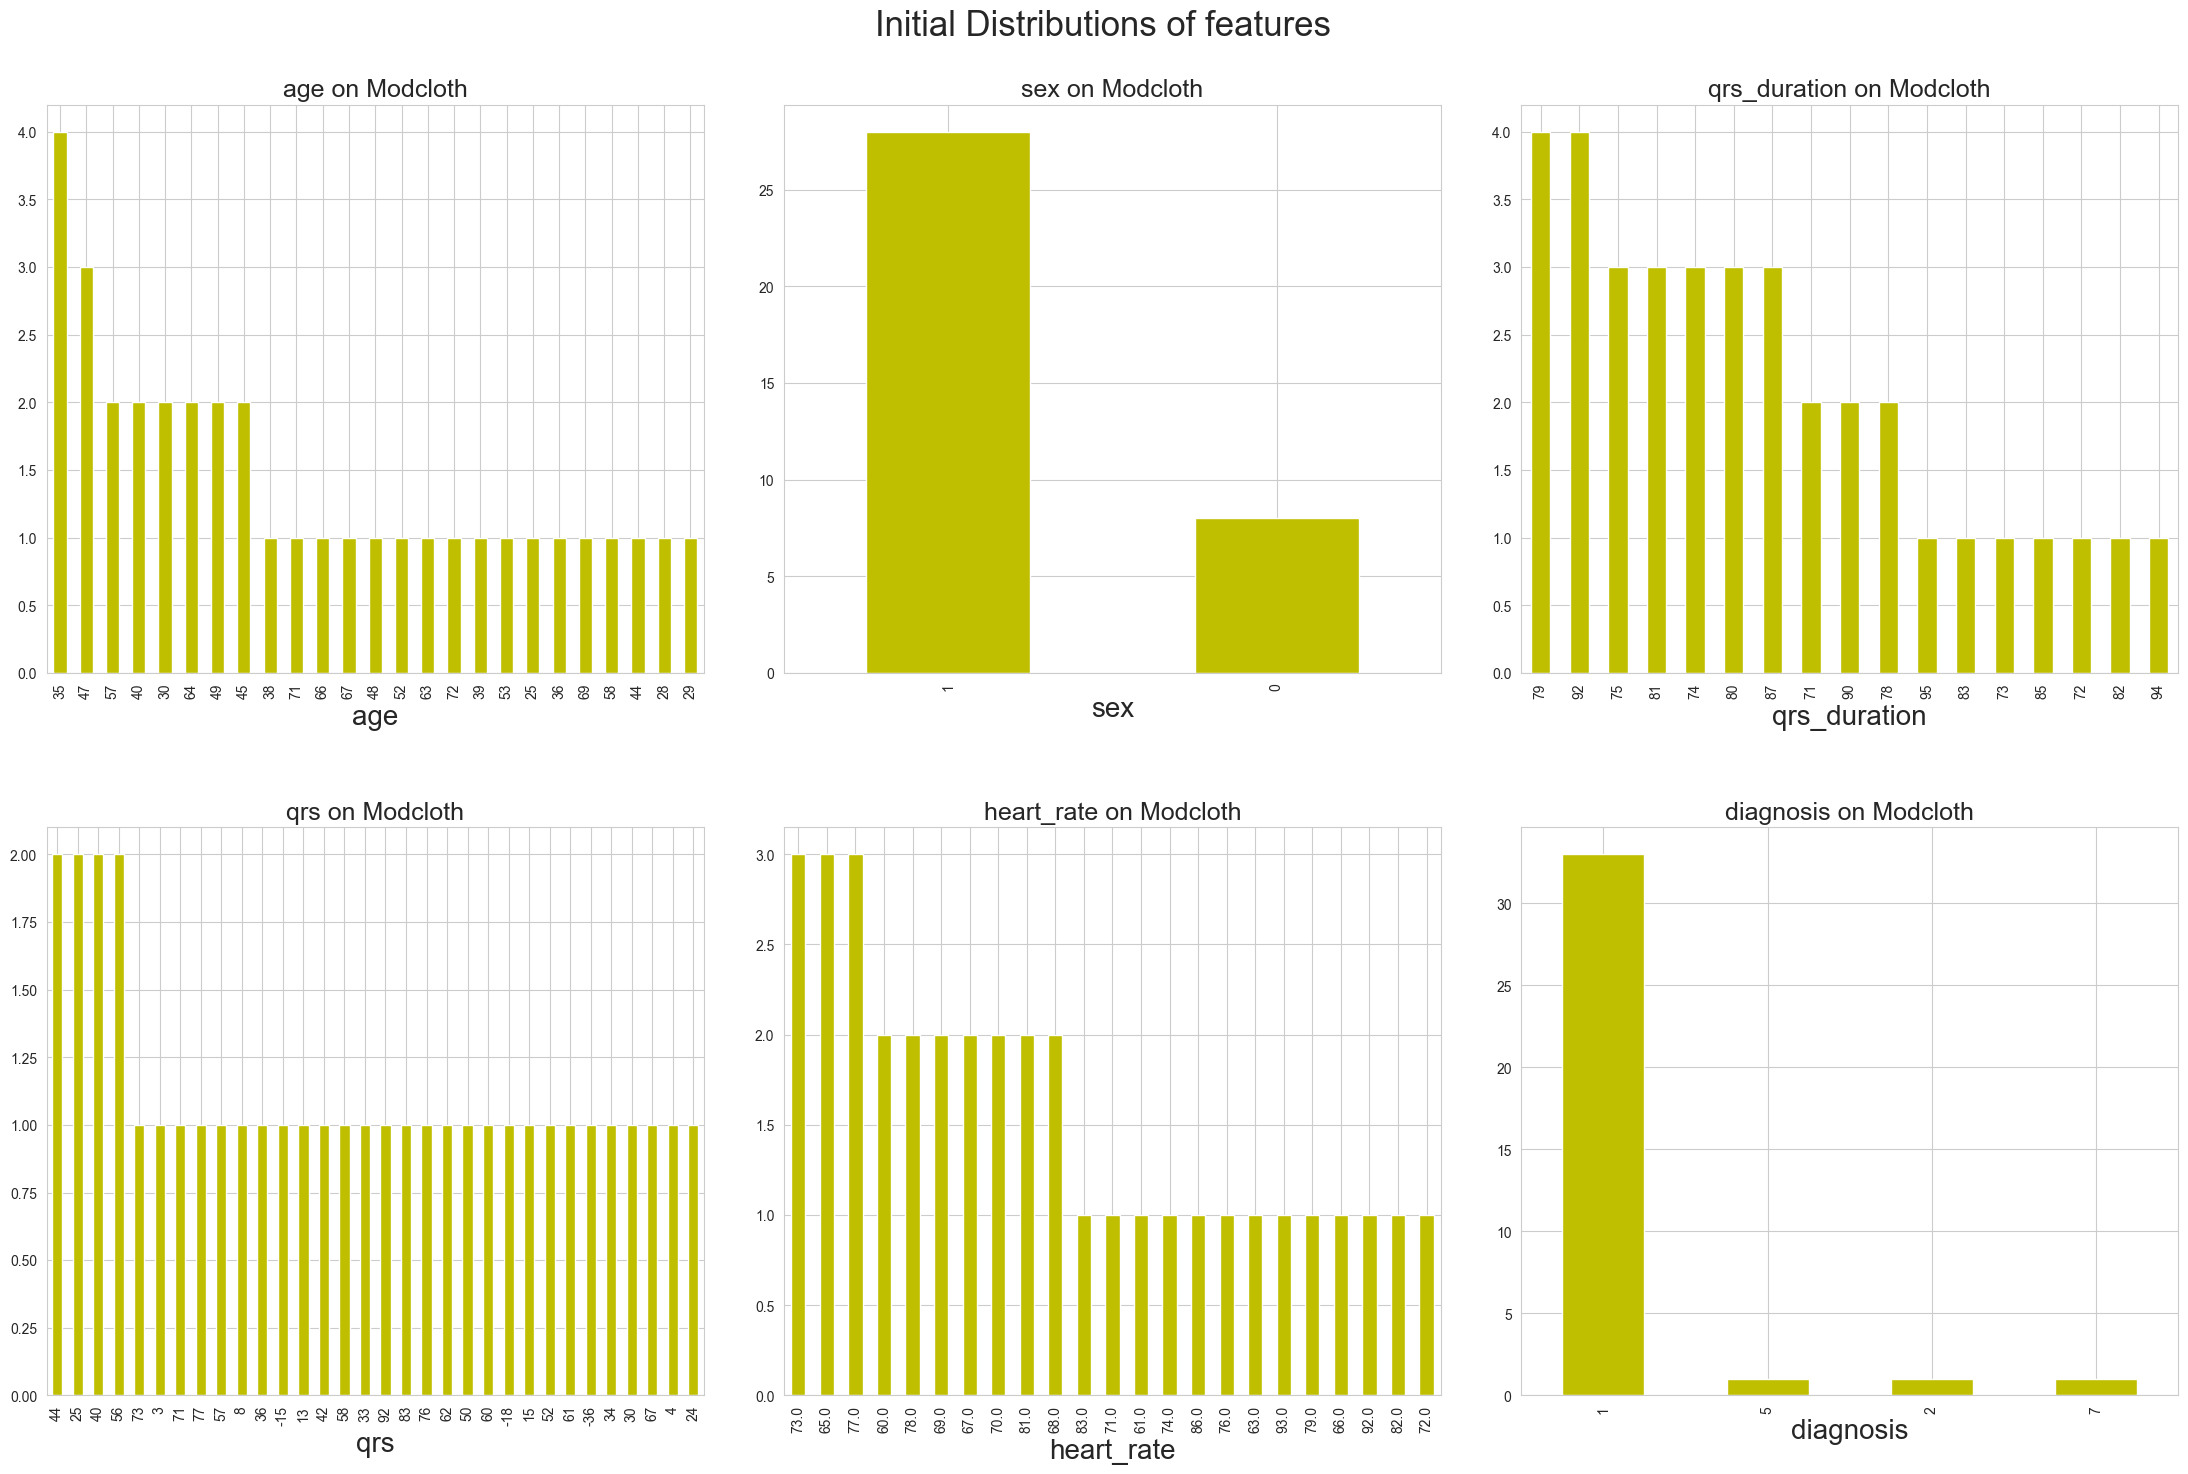

In [116]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize=18)
    return ax


f, ax = plt.subplots(2, 3, figsize=(22, 15))
f.tight_layout(h_pad=9, w_pad=3, rect=[0, 0.03, 1, 0.93])
cols = ['age', 'sex', 'qrs_duration', 'qrs', 'heart_rate', 'diagnosis']
k = 0
for i in range(2):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize=25)

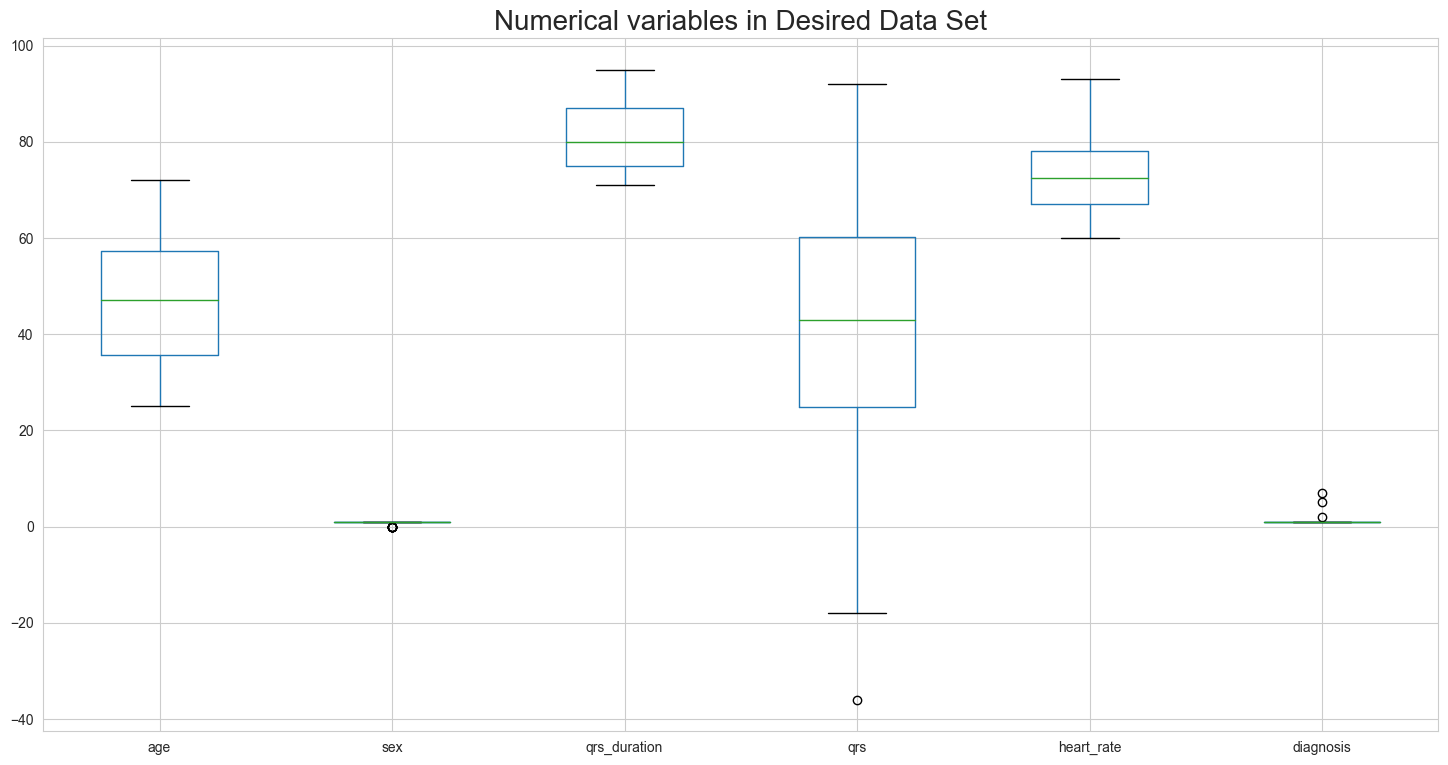

In [117]:
data_set = ['age', 'sex', 'qrs_duration', 'qrs', 'heart_rate', 'diagnosis']
plt.figure(figsize=(18, 9))
df[data_set].boxplot()
plt.title("Numerical variables in Desired Data Set", fontsize=20)
plt.show()

## Standardization
Standardization is a specific type of data transformation that scales the numerical features to have zero mean and unit variance. This step is typically performed after preprocessing to ensure the data is in a suitable format for subsequent analysis,

In [118]:
def standardization(all_data):
    for column in all_data.columns:
        if column != 'diagnosis':
            all_data[column] = (all_data[column] - all_data[column].mean()) / (all_data[column].std())
    return all_data

In [119]:
test_start_id = len(df)
all_data = standardization(df.copy())
std_train = all_data.iloc[:test_start_id]

In [120]:
all_data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
15,-0.035012,0.527046,-1.901546,-1.624369,-0.927125,-0.797011,-0.888068,0.769712,-1.245591,-0.136620,...,0.003721,0.120571,NaN,NaN,0.418564,0.089407,0.077931,0.108416,1,-1.448316
22,-0.850580,0.527046,-1.460845,0.732178,-1.490441,-0.797011,-0.180981,0.769712,-0.234581,0.739245,...,0.539570,-0.086122,NaN,NaN,-0.101033,0.089407,0.441338,0.394872,1,-1.393201
23,0.706414,0.527046,0.301962,-0.664294,-0.927125,0.276806,1.940282,-0.674076,0.360131,-1.214607,...,-0.442820,0.430610,NaN,NaN,-0.620629,-0.715256,0.252366,-0.088523,1,-1.385327
41,-0.554010,0.527046,-0.432541,0.732178,-0.363809,0.147948,-0.888068,0.269939,0.479073,0.907680,...,-0.710745,-0.396162,NaN,NaN,-0.620629,-0.983477,-1.244872,-1.225395,1,-1.243601
47,-1.295435,0.527046,-0.726342,-0.838853,-1.208783,-0.582247,0.071551,-0.674076,-0.531937,-0.338742,...,0.807495,0.947343,NaN,NaN,-0.620629,-1.519918,0.891963,-0.348124,1,-1.196359
51,-1.443720,0.527046,-1.020143,-1.275251,0.199508,-0.668153,-0.433512,0.769712,-0.353523,-0.203994,...,-0.621436,0.017224,NaN,NaN,-0.101033,-0.581145,-0.692493,-0.643531,1,-1.164864
61,-0.924722,0.527046,-0.432541,-1.362530,-0.504638,-0.152721,-2.201231,-0.007713,-0.650879,-0.001872,...,0.807495,-1.532973,NaN,NaN,0.938161,1.028180,-0.677956,0.287451,5,-1.086128
65,-0.257439,0.527046,-1.167043,-0.140617,-0.222979,-1.441301,-0.231487,-0.729607,-0.829293,0.537122,...,-0.666090,0.947343,NaN,NaN,-0.101033,-0.715256,-0.081969,-0.545062,1,-1.054633
69,1.225412,0.527046,-1.020143,1.343135,0.762824,0.878144,0.627119,-0.174304,0.954843,-2.562091,...,-1.693135,-0.086122,NaN,NaN,0.938161,-0.044703,-1.462916,-0.974746,1,-1.023138
74,-0.924722,0.527046,-0.726342,-0.577014,0.762824,-0.539295,0.778638,1.269485,-1.067177,0.705557,...,1.566615,0.947343,NaN,NaN,-0.620629,2.503395,1.807749,2.749181,1,-0.983770


In [121]:
std_train

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
15,-0.035012,0.527046,-1.901546,-1.624369,-0.927125,-0.797011,-0.888068,0.769712,-1.245591,-0.136620,...,0.003721,0.120571,NaN,NaN,0.418564,0.089407,0.077931,0.108416,1,-1.448316
22,-0.850580,0.527046,-1.460845,0.732178,-1.490441,-0.797011,-0.180981,0.769712,-0.234581,0.739245,...,0.539570,-0.086122,NaN,NaN,-0.101033,0.089407,0.441338,0.394872,1,-1.393201
23,0.706414,0.527046,0.301962,-0.664294,-0.927125,0.276806,1.940282,-0.674076,0.360131,-1.214607,...,-0.442820,0.430610,NaN,NaN,-0.620629,-0.715256,0.252366,-0.088523,1,-1.385327
41,-0.554010,0.527046,-0.432541,0.732178,-0.363809,0.147948,-0.888068,0.269939,0.479073,0.907680,...,-0.710745,-0.396162,NaN,NaN,-0.620629,-0.983477,-1.244872,-1.225395,1,-1.243601
47,-1.295435,0.527046,-0.726342,-0.838853,-1.208783,-0.582247,0.071551,-0.674076,-0.531937,-0.338742,...,0.807495,0.947343,NaN,NaN,-0.620629,-1.519918,0.891963,-0.348124,1,-1.196359
51,-1.443720,0.527046,-1.020143,-1.275251,0.199508,-0.668153,-0.433512,0.769712,-0.353523,-0.203994,...,-0.621436,0.017224,NaN,NaN,-0.101033,-0.581145,-0.692493,-0.643531,1,-1.164864
61,-0.924722,0.527046,-0.432541,-1.362530,-0.504638,-0.152721,-2.201231,-0.007713,-0.650879,-0.001872,...,0.807495,-1.532973,NaN,NaN,0.938161,1.028180,-0.677956,0.287451,5,-1.086128
65,-0.257439,0.527046,-1.167043,-0.140617,-0.222979,-1.441301,-0.231487,-0.729607,-0.829293,0.537122,...,-0.666090,0.947343,NaN,NaN,-0.101033,-0.715256,-0.081969,-0.545062,1,-1.054633
69,1.225412,0.527046,-1.020143,1.343135,0.762824,0.878144,0.627119,-0.174304,0.954843,-2.562091,...,-1.693135,-0.086122,NaN,NaN,0.938161,-0.044703,-1.462916,-0.974746,1,-1.023138
74,-0.924722,0.527046,-0.726342,-0.577014,0.762824,-0.539295,0.778638,1.269485,-1.067177,0.705557,...,1.566615,0.947343,NaN,NaN,-0.620629,2.503395,1.807749,2.749181,1,-0.983770
